# Análise Exploratória dos Dados

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('max_rows', 500)

In [3]:
data_path = 'dataset'
files = [x for x in os.listdir(data_path) if x.endswith('.csv')]
files

['BD_SERVICOS.csv', 'BD_CONSUMO.csv', 'BD_DEM_TIME.csv']

## Variáveis de Ambiente

In [3]:
ano_atual = 2021
ano_antigo = 1900

# BD_DEM_TIME.csv

In [15]:
df_bem_time = pd.read_csv(os.path.join(data_path, 'BD_DEM_TIME.csv'))
df_bem_time

,KEY,SEXO,DTA_NASC,ESTADO,TIME
0,2421280,M,1994.0,Minas Gerais,Cruzeiro
1,1604566,M,1990.0,Bahia,Flamengo
2,133472,M,1985.0,Rio de Janeiro,Botafogo
3,1069773,M,1989.0,Rio Grande do Sul,Gremio
4,2083240,M,1994.0,Sao Paulo,Santos
...,...,...,...,...,...
951459,2372668,M,1994.0,Rio Grande do Sul,Gremio
951460,1640963,M,1988.0,Sao Paulo,Sao Paulo
951461,810316,M,1982.0,Sao Paulo,Corinthians
951462,3113267,NaN,NaN,Rio de Janeiro,Botafogo


## Data de Nascimento

In [107]:
column = 'DTA_NASC'
mask = (df_bem_time[column]>ano_antigo) & (df_bem_time[column]<ano_atual)
df_bem_time.loc[~mask, column] = None # joga quem ta fora da data para None
df_bem_time['IDADE'] = ano_atual - df_bem_time[column]
df_bem_time = df_bem_time.drop(columns=[column])

## Idade

<AxesSubplot:title={'center':'IDADE'}, ylabel='Frequency'>

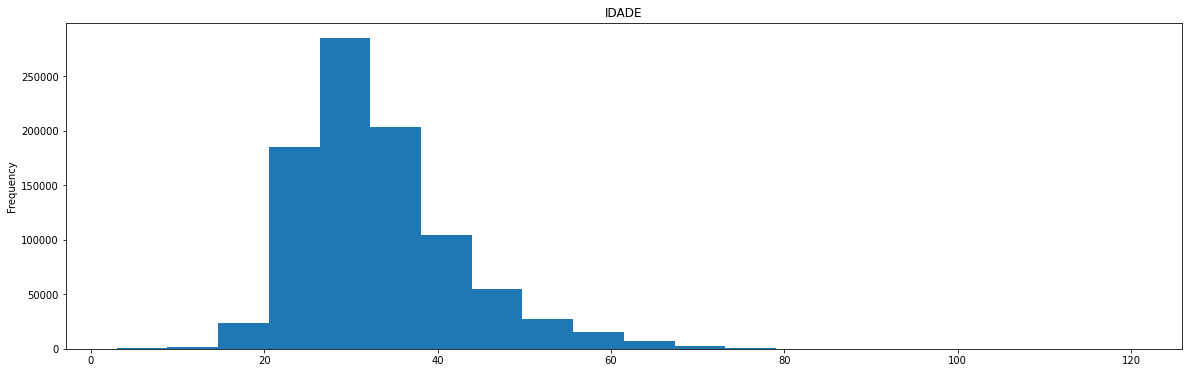

In [108]:
# Existem valores estranhos para Data de Nascimento
column='IDADE'
df_bem_time[column].plot.hist(figsize=(20, 6), title=column, bins=20)

In [112]:
df_bem_time.describe()

,KEY,IDADE
count,9.514640e+05,912526.000000
mean,1.708691e+06,33.298431
std,9.852548e+05,9.324710
min,3.000000e+00,3.000000
25%,8.548928e+05,27.000000
50%,1.709532e+06,32.000000
75%,2.562060e+06,38.000000
max,3.414422e+06,120.000000


In [111]:
# Quantidade de Idades Nulas
column='IDADE'
df_bem_time[column].isna().sum()

38938

## Sexo

In [113]:
column='SEXO'
mask = (df_bem_time[column] == 'M') | (df_bem_time[column] == 'F')
df_bem_time.loc[~mask, 'SEXO'] = None

<AxesSubplot:title={'center':'SEXO'}>

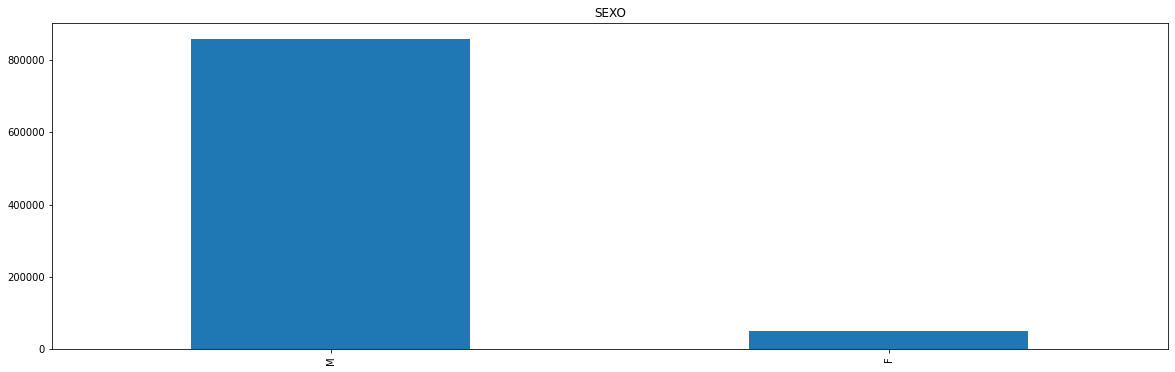

In [124]:
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [118]:
df_bem_time[column].value_counts(dropna=False).to_frame()

,SEXO
M,858914
F,51345
NaN,41205


## Estado

In [130]:
column = 'ESTADO'
df_bem_time.loc[df_bem_time[column]=='Nao informado', column] = None

<AxesSubplot:title={'center':'ESTADO'}>

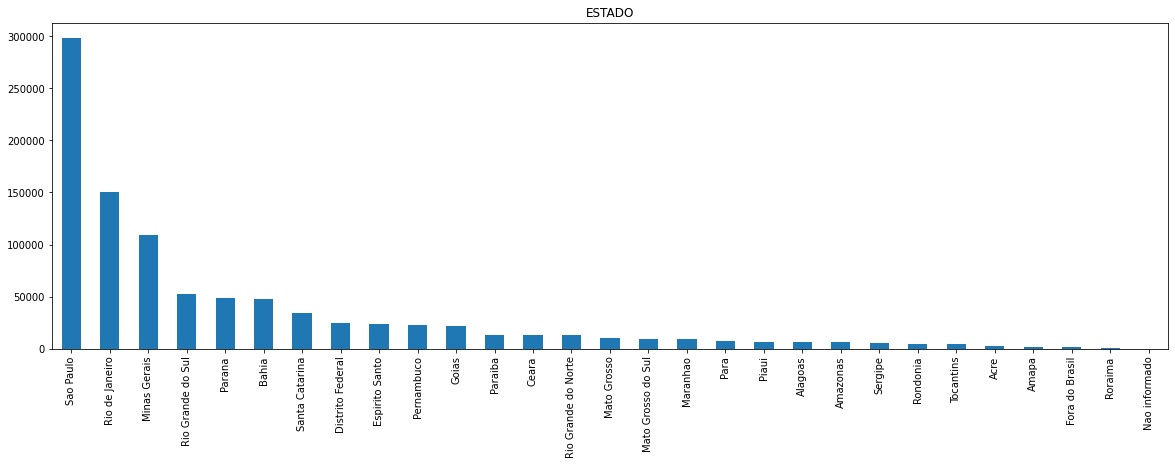

In [234]:
column = 'ESTADO'
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [235]:
df_bem_time[column].value_counts(dropna=False).to_frame()

,ESTADO
Sao Paulo,298040
Rio de Janeiro,150608
Minas Gerais,108878
Rio Grande do Sul,52139
Parana,49036
Bahia,47848
Santa Catarina,34581
Distrito Federal,24311
Espirito Santo,23790
Pernambuco,23001


## Time

Total de Times: 29


<AxesSubplot:title={'center':'TIME'}>

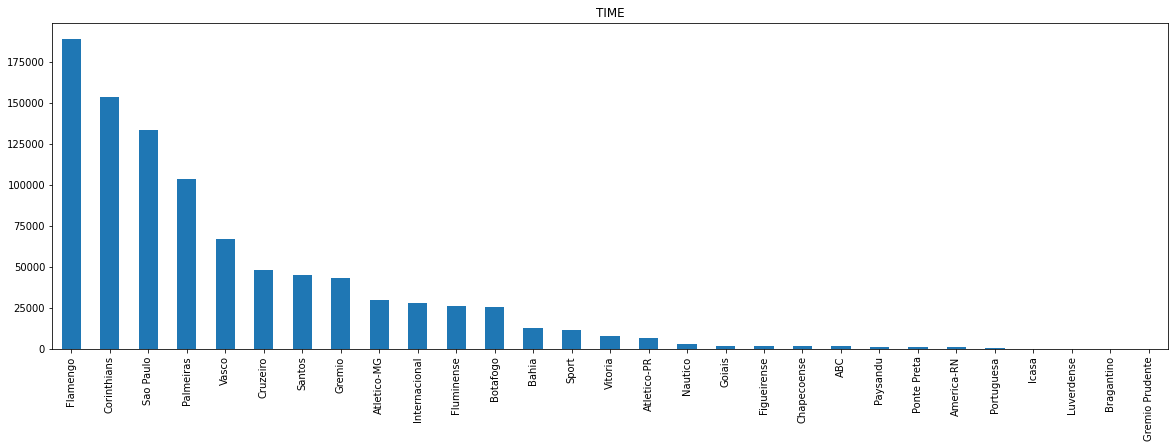

In [140]:
column='TIME'
print('Total de Times:', len(df_bem_time[column].unique()))
df_bem_time[column].value_counts().plot.bar(figsize=(20, 6), title=column)

In [53]:
column='TIME'
df_bem_time[column].value_counts(dropna=False).to_frame()

,TIME
Flamengo,189334
Corinthians,153985
Sao Paulo,133624
Palmeiras,103745
Vasco,67106
Cruzeiro,48067
Santos,45403
Gremio,43627
Atletico-MG,30082
Internacional,28143


# BD_SERVICOS.csv

In [4]:
df_servicos = pd.read_csv(os.path.join(data_path, 'BD_SERVICOS.csv'))
df_servicos

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
0,2812202,0,0,0,0,0
1,609314,0,0,0,0,0
2,1837779,0,0,0,0,0
3,950603,0,0,0,0,0
4,2105538,0,0,1,0,0
...,...,...,...,...,...,...
951459,1278011,1,0,1,0,1
951460,2042105,1,0,0,0,1
951461,1898803,1,1,1,0,1
951462,3106291,1,0,1,0,1


In [7]:
df_servicos.describe() # São colunas categóricas de fato

,KEY,GLOBOPLAY,PREMIERE_PLAY,GLOBOSAT_PLAY,COMBATE,CARTOLA_PRO
count,9.514640e+05,951464.000000,951464.000000,951464.000000,951464.000000,951464.000000
mean,1.708691e+06,0.401452,0.185091,0.237106,0.017795,0.154316
std,9.852548e+05,0.490192,0.388371,0.425308,0.132205,0.361251
min,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.548928e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.709532e+06,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.562060e+06,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.414422e+06,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

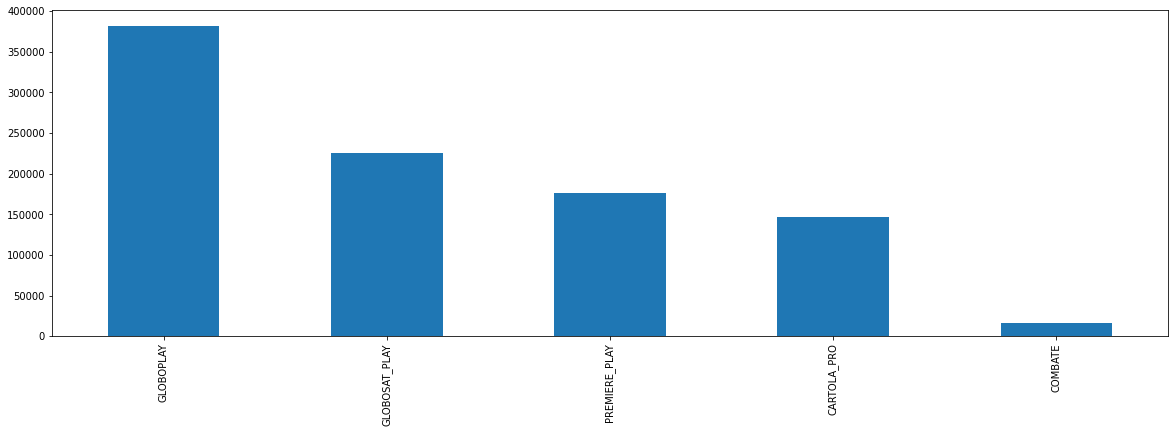

In [166]:
df_servicos.drop(columns=['KEY']).sum().sort_values(ascending=False).plot.bar(figsize=(20, 6))

<AxesSubplot:title={'center':'Número de Serviços por Usuário'}>

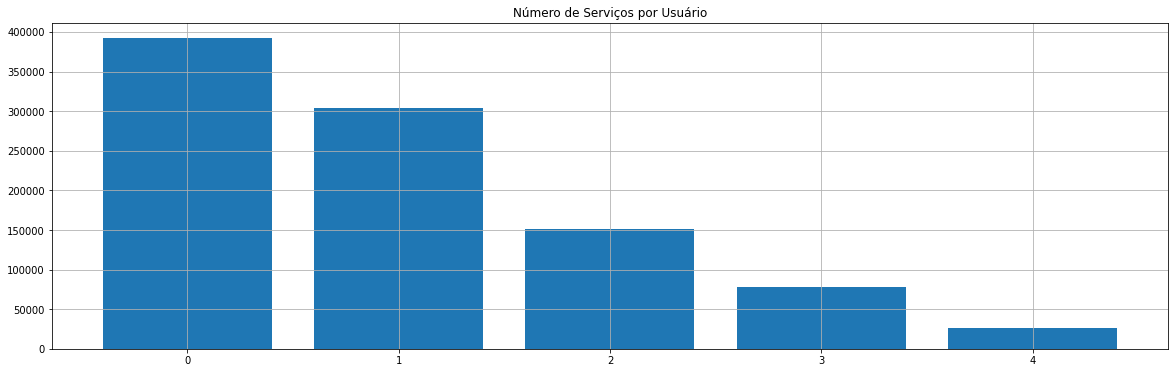

In [165]:
plt.title('Número de Serviços por Usuário')
df_servicos.drop(columns=['KEY']).sum(axis=1).hist(figsize=(20, 6), bins=5, align='left', rwidth=0.8)

# BD_CONSUMO.csv

In [5]:
df_consumo = pd.read_csv(os.path.join(data_path, 'BD_CONSUMO.csv'))
df_consumo = df_consumo.dropna()
df_consumo.shape

(14174706, 3)

In [65]:
df_group_consumo = df_consumo.groupby('KEY')

<AxesSubplot:>

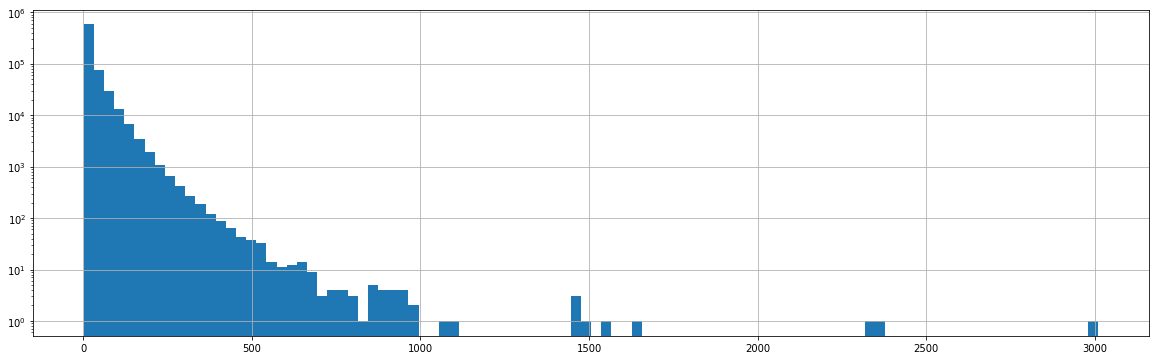

In [206]:
df_group_consumo.count()['tempo'].hist(figsize=(20, 6), bins=100, log=True)

In [207]:
df_group_consumo.count()['tempo'].describe(percentiles=[.25, .5, .75, .9, .95, .99, .999]).round(2).astype(str).to_frame()

,tempo
count,711705.0
mean,19.92
std,35.1
min,1.0
25%,2.0
50%,7.0
75%,23.0
90%,53.0
95%,82.0
99%,161.0


## tempo

<AxesSubplot:>

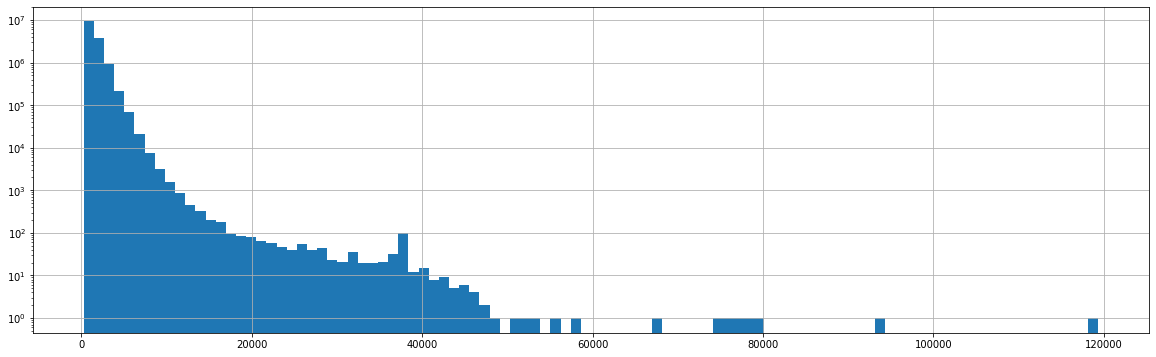

In [191]:
df_consumo['tempo'].hist(figsize=(20, 6), bins=100, log=True)

In [202]:
df_consumo[df_consumo['tempo'] > 7550]

,KEY,tempo,url
1098,1367044,7656.0,https://globoesporte.globo.com/futebol/times/f...
2022,2735619,9209.0,https://globoesporte.globo.com/futebol/times/s...
2372,2226394,7743.0,http://globoesporte.globo.com/sp/santos-e-regi...
3476,3306127,8826.0,https://globoesporte.globo.com/futebol/selecoe...
4829,2079106,9564.0,http://globoesporte.globo.com/ba/futebol/notic...
...,...,...,...
14167280,1980873,7599.0,https://globoesporte.globo.com/ba/futebol/time...
14167899,2695456,8473.0,https://globoesporte.globo.com/mg/futebol/noti...
14169515,1837580,9043.0,https://globoesporte.globo.com/sp/santos-e-reg...
14173108,170879,7732.0,http://globoesporte.globo.com/rs/futebol/times...


In [204]:
df_consumo['tempo'].describe(percentiles=[.25, .5, .75, .9, .95, .99, .999]).round(2).astype(str).to_frame()

,tempo
count,14174706.0
mean,1362.17
std,978.27
min,292.0
25%,726.0
50%,1150.0
75%,1754.0
90%,2561.0
95%,3142.0
99%,4731.0


## links

In [6]:
am = df_consumo[:].copy()

In [7]:
# remove o nome do site, pega apenas os argumentos
am['url'] = am['url'].str.split(".com/").str.get(1)

In [8]:
split_futebol = am['url'].str.split("futebol/")

In [393]:
am['url_region'] = split_futebol.str.get(0).str[:-1]

In [394]:
am['url_region'] = am['url_region'].str.split("/").str.get(0)

In [395]:
am.loc[am['url_region'].str.len() > 2, 'url_region'] = None

In [396]:
am.loc[am['url_region'] == '', 'url_region'] = None

In [9]:
split_noticia = split_futebol.str.get(1).str.split("noticia/")

In [398]:
am['url_noticia'] = split_noticia.str.get(1)

In [ ]:
am['url_noticia'] = am['url_noticia'].str.replace('-', '')

In [9]:
am['url_campeonato'] = split_noticia.str.get(0).str.split("times/").str.get(0).str[:-1]

In [10]:
am['url_campeonato'] = am['url_campeonato'].str.split("/").str.get(0)

In [11]:
am.loc[am['url_campeonato'] == '', 'url_campeonato'] = None

In [10]:
am['url_times'] = split_noticia.str.get(0).str.split("times/").str.get(1).str[:-1]

In [11]:
am['url_times'] = am['url_times'].str.split("/").str.get(0)

In [12]:
am['url_times'] = am['url_times'].str.lower().str.replace('-', '').str.replace(' ', '').str.replace('siga', '')

nome_times = df_bem_time['TIME'].str.replace('-', '').str.replace(' ', '').str.lower().unique()

am.loc[am['url_times'].isin(nome_times)==False, 'url_times'] = None

NameError: name 'df_bem_time' is not defined

In [ ]:
#am.loc[am['url_times'] == '', 'url_times'] = None

In [ ]:
am.drop(columns=['url'], inplace=True)

In [ ]:
am

## url_region

In [465]:
am['url_region'].unique()

array(['mg', None, 'pb', 'sp', 'rj', 'al', 'pr', 'rs', 'sc', 'ce', 'go',
       'ba', 'pe', 'rn', 'df', 'pi', 'am', 'pa', 'ac', 'es', 'ma', 'mt',
       'to', 'se', 'ms', 'ap', 'ro'], dtype=object)

<AxesSubplot:title={'center':'url_region'}>

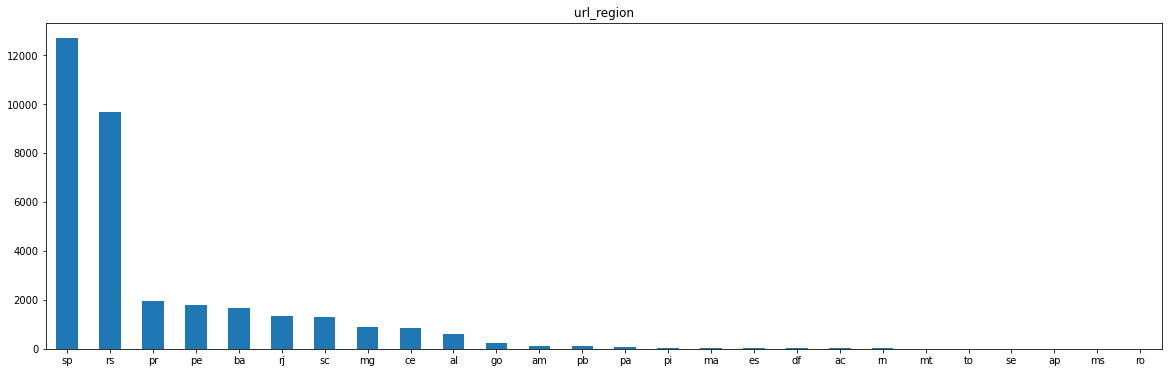

In [398]:
am['url_region'].value_counts().plot.bar(figsize=(20, 6), title='url_region', rot=0)

In [396]:
am['url_region'].value_counts(dropna=False)

NaN    66454
sp     12687
rs      9683
pr      1958
pe      1778
ba      1665
rj      1354
sc      1310
mg       875
ce       839
al       587
go       245
am       129
pb        98
pa        78
pi        53
ma        43
es        38
df        33
ac        31
rn        24
to        12
mt        12
se         7
ap         3
ms         3
ro         1
Name: url_region, dtype: int64

## url_noticia

In [285]:
am['url_noticia'].dropna().shape

(162656,)

In [410]:
am['url_noticia'].isna()

0         False
1          True
2          True
3         False
4         False
          ...  
299995    False
299996     True
299997     True
299998    False
299999     True
Name: url_noticia, Length: 300000, dtype: bool

In [417]:
mask = (am['url_noticia'].str.contains('|'.join(nome_times))) & (am['url_times'].isna())
am[mask]

,KEY,tempo,url_region,url_noticia,url_times
10,1044874,1850.0,pr,rodada20tudooquevoceprecisasabersobreparanaxsa...,None
17,1019801,478.0,sp,rodada20tudooquevoceprecisasabersobrepalmeiras...,None
21,2853306,1661.0,rj,segueovicelidersaopauloassumeliderancaetorcedo...,None
56,2473054,736.0,rs,alemdetitegremioxflamengoatraiolheiroseuropeus...,None
58,3295101,2154.0,sp,saopauloacertaacontratacaodeevertonfelipemorat...,None
...,...,...,...,...,...
299875,1019642,2602.0,sp,stjdaceitapedidodopalmeirasparajulgarcasoeadia...,None
299899,2645627,1878.0,sp,rodada20tudooquevoceprecisasabersobrepalmeiras...,None
299919,67876,1123.0,pe,nosportevertonfelipepedeparanaotreinarenquanto...,None
299962,120992,2349.0,sp,rodada18tudooquevoceprecisasabersobrepalmeiras...,None


In [377]:
df_not = am.loc[am['url_times'].isna(), ['url_noticia', 'url_times', 'url_region']].dropna(subset=['url_noticia'])

In [379]:
df_not['url_noticia'] = df_not['url_noticia'].str.replace('-', '')

In [381]:
df_not = df_not[df_not['url_noticia'].str.contains('|'.join(nome_times))]

In [383]:
for time in nome_times:
    df_not[time] = df_not['url_noticia'].str.find(time)+1

/home/betine/anaconda3/envs/Globo_Case/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [385]:
df_not.drop(columns=['url_noticia'], inplace=True)

/home/betine/anaconda3/envs/Globo_Case/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_not.drop(columns=['url_times'], inplace=True)

## url_campeonato

In [ ]:
nome_estados=df_bem_time['ESTADO'].dropna().str.replace('-', '').str.replace(' ', '').str.lower().unique()
nome_estados

In [12]:
am['url_campeonato'] = am['url_campeonato'].str.replace('-', '').str.replace('campeonato', '').str.replace('copa', '')

In [13]:
replace_times = {
    "mineiro": "minasgerais",
    "baiano": "bahia",
    "carioca": "riodejaneiro",
    "fluminense": "riodejaneiro",
    "gaucho": "riograndedosul",
    "paulista": "saopaulo",
    "pernambucano": "pernambuco",
    "capixaba": "espiritosanto",
    "espiritosantense": "espiritosanto",
    "piauiense": "piaui",
    "potiguar": "riograndedonorte",
    "norteriograndense": "riograndedonorte",
    "catarinense": "santacatarina",
    "barrigaverde": "santacatarina",
    "paraibano": 'paraiba', 
    "sulmatogrossense": 'matogrossodosul', 
    "matogrossense": 'matogrosso',
    "paranaense": 'parana', 
    "goiano": 'goias', 
    "paraense": 'para', 
    "cearense": 'ceara', 
    "sergipano": 'sergipe',
    "rondoniano": 'rondonia', 
    "rondoniense": 'rondonia', 
    "brasiliense": 'distritofederal', 
    "alagoano": 'alagoas', 
    "amazonense": 'amazonas', 
    "amapaense": 'amapa',
    "maranhense": 'maranhao', 
    "acriano": 'acre', 
    "acreano": 'acre',
    "tocantinense": 'tocantins', 
    "roraimense": 'roraima'
}

In [14]:
am['url_campeonato'] = am['url_campeonato'].replace(replace_times, regex=True)
am['url_campeonato'].unique()

array([None, 'paraiba', 'brasileiraoseriea', 'libertadores', 'dobrasil',
       'riodejaneiroserieb1', 'minasgeraismodulo2', nan, 'sulamericana',
       'riodejaneiroseriec', 'voceescala', 'riograndedosulsegundadivisao',
       'minasgeraissegundadivisao', 'saopaulo', 'riodejaneiroserieb2',
       'mundialdeclubes', 'saopaulosegundadivisao',
       'simuladordocampeaobrasileiro', 'brasileiro', 'selecoes',
       'santacatarinasegundadivisao', 'espiritosanto', '',
       'riograndedosul', 'spdefuteboljunior', 'saopauloseriea2',
       'minasgerais', 'mapadascurtidas2017', 'tacabhsub17',
       'riodejaneiro', 'rio', 'riograndedonorte', 'ligadoscampeoes',
       'parana', 'brasileiraoseriea%20simulador', 'verde',
       'quintaldabola', 'futebolfeminino', 'acre', 'amazonas',
       'donordeste', 'torneiodaflorida', 'aovivo', 'votacao', '12042012',
       'ceara', 'america', 'CopaSPdefuteboljunior', 'matogrossodosul',
       'vaievemdomercado', 'mapadastorcidasnofacebook', 'pernambuco',
 

In [15]:
am['url_campeonato'].value_counts(dropna=False)

NaN                                                                                13229950
brasileiraoseriea                                                                    469673
libertadores                                                                         195973
dobrasil                                                                             149460
sulamericana                                                                          26841
saopaulo                                                                              16749
brasileiro                                                                            15080
selecoes                                                                               9396
saopaulosegundadivisao                                                                 7930
voceescala                                                                             5510
santacatarinasegundadivisao                                                     

In [16]:
am.shape

(14174706, 4)

In [272]:
am.loc[am['url_campeonato'].str.contains('|'.join(nome_estados))==True]['url_campeonato'].unique()

array(['paraiba', 'riodejaneiroserieb1', 'minasgeraismodulo2',
       'riodejaneiroseriec', 'riograndedosulsegundadivisao',
       'minasgeraissegundadivisao', 'saopaulo', 'riodejaneiroserieb2',
       'saopaulosegundadivisao', 'santacatarinasegundadivisao',
       'espiritosanto', 'riograndedosul', 'saopauloseriea2',
       'minasgerais', 'riodejaneiro', 'riograndedonorte', 'parana',
       'acre', 'amazonas', 'ceara', 'matogrossodosul', 'pernambuco',
       'paraibasegundadivisao', 'sergipe', 'maranhaoserieb',
       'goiassegundadivisao', 'santacatarina', 'saopauloseriea3',
       'maranhao', 'distritofederal', 'pernambucoseriea2',
       'parasegundadivisao', 'sergipeseriea2', 'matogrosso',
       'espiritosantofeminino', 'alagoas', 'rondonia', 'piaui',
       'espiritosantoserieb', 'bahia', 'cearaserieb', 'paraibasub21'],
      dtype=object)

In [495]:
am[am[['url_campeonato', 'url_times']].isna().all(axis=1)]

,KEY,tempo,url_region,url_noticia,url_campeonato,url_times
5,2205445,464.0,rj,ex-capitao-do-fla-jonatas-desiste-de-retomar-a...,None,NaN
6,1099505,1656.0,al,walter-e-preso-em-maceio-por-mostrar-arma-de-b...,None,NaN
56,2473054,736.0,rs,alem-de-tite-gremio-x-flamengo-atrai-olheiros-...,None,NaN
58,3295101,2154.0,sp,sao-paulo-acerta-a-contratacao-de-everton-feli...,None,NaN
95,3357704,1896.0,rj,ex-capitao-do-fla-jonatas-desiste-de-retomar-a...,None,NaN
...,...,...,...,...,...,...
99823,955513,1225.0,ba,vencido-pelas-dores-obina-anuncia-fim-da-carre...,None,NaN
99940,580560,3753.0,sp,sao-paulo-acerta-a-contratacao-de-everton-feli...,None,NaN
99958,875165,1357.0,rj,juiza-atende-pedido-do-flu-e-determina-bloquei...,None,NaN
99968,40576,3068.0,rs,apos-reuniao-inter-fecha-contratacao-de-guerre...,None,NaN


## url_times

In [ ]:
am['url_times'].unique()

In [16]:
nome_times = df_bem_time['TIME'].str.replace('-', '').str.replace(' ', '').str.lower().unique()
am['url_times'] = am['url_times'].str.lower().str.replace('-', '').str.replace(' ', '').str.replace('siga', '')
valid = am['url_times'].isin(nome_times)
am.loc[valid==False, 'url_times'] = None

<AxesSubplot:title={'center':'URL time'}>

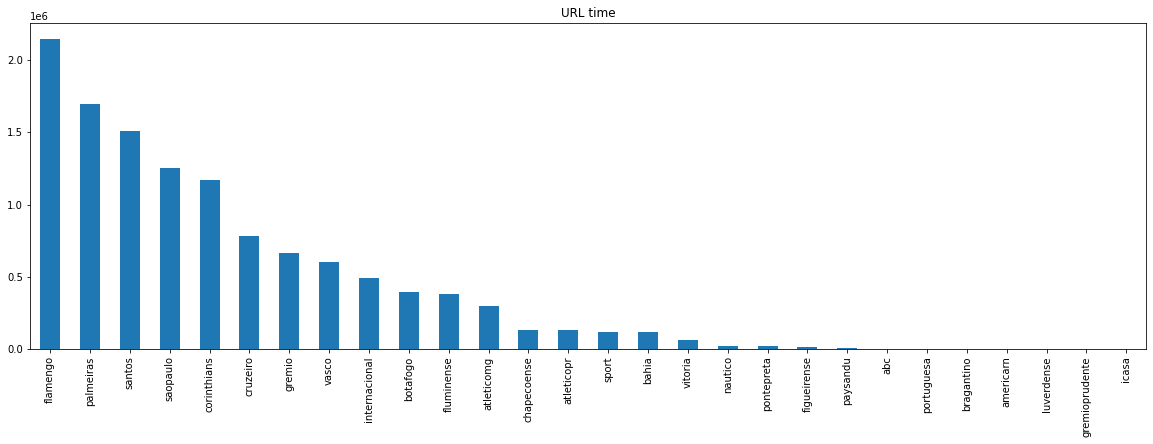

In [17]:
am['url_times'].value_counts().plot.bar(figsize=(20, 6), title='URL time')